In [507]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot') 

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



import sys

import seaborn as sns
from sklearn import metrics

#Based on Eddie Lam's code

'''
Reusing code:
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Explaining result:
https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report


Test_fearMat_Clean: 4168
    Before edit: 4231 rows × 34 columns
    After edit: 4168 rows × 34 columns
    
    #removed 6 to 7
    total = 3749         (20% = 750; 80% = 2,999)
    

Train_fearMat_Clean: 16680
    Before edit: 16927 rows × 34 columns
    After edit: 16680 rows × 34 columns
    
    #removed 6 to 7
    total = 15045         (20% = 3,009; 80% = 12,036)

'''

import os


print(os.listdir(r"."))         #print out what's in the file/directory
#train = pd.read_csv(r"featMatVersion0.csv")
#This is the unedited file from Eddie

#train = pd.read_csv(r"featMatVersion1.csv")

#train = pd.read_csv(r"featMatVersion2.csv")


#/content/featMatVersion2.csv

#train = pd.read_csv(r"featMatVersion3.csv")

#train = pd.read_csv(r"featMatVersion4.csv")
#Same as original but no comunns 2 and 13


#train = pd.read_csv(r"featMatVersion5.csv")
#Same as version1 but no comunns 2 and 13


#train = pd.read_csv(r"featMatVersion6.csv")
#Same as version2 but no comunns 2 and 13


#train = pd.read_csv(r"featMatVersion7.csv")
#Same as version3 but no comunns 2 and 13





train = pd.read_csv(r"featMatVersion8.csv")
#Same as version0 but only 2 users
#has only 2 users
#Uses 1 and 2
#still sizable difference between users
#need to find 2 users w






#Find out how to randomize dataset

#Version Orginal is the unmodified dataset from Eddie

# This Version1 uses one authentic user with a class ID of 1
# The rest have a class ID of 0

#Version 2 has sessions 6 and 7 removed

#Version 3 has sessions 6 and 7 removed and authentic user with class 1 and rest 0

#clean up the negative values for interstroke?

#compare only 2 people?

#remove columns 2 and 13?

#Make a second code for the ones with the removed columns

#Too much data to clean up

#Should try randomizing

#upload the csv to google colab
#for some reason need to do this each time
#need to find a way to store and acces from drive

#pd.read_csv('/My Drive/Collab Notebooks/featMatVersionOriginal.csv')

#Try to get data from google drive instead of manually importing it

#Maybe try removing sessions 6 and 7





#Create a file that has only 2 users




['.config', 'featMatVersion8.csv', 'sample_data']


In [508]:
#print
train.head()

,User_ID,Doc_ID,Inter-Stroke time,Stroke Duration,Start X,Start Y,Stop X,Stop Y,Direct end-to-end Distance,Mean resulant length,WSAD Flag,Direction of end-to-end Time,Phone_ID,20 per pairwise velocity,50 per pairwise velocity,80 per pairwise velocity,20 per pairwise acc,50 per pairwise acc,80 per pairwise acc,Median velocity at last 3pts,Largest deviation from end-to-end line,20 per dev line,50 per dev line,80 per dev line,Average Direction,Length of Trajectory,Ratio dist and length of trajectory,Average velocity,Median acceleration at first 5 pts,Mid-Stroke pressure,Mid-Stroke area covered,Mid-Stroke finger orientation,Change of finger orientation,Phone orientation
0,1,4,0.913,0.320,27.7980,-35.647,5.8867,-36.737,21.939,0.83553,4,-3.09190,2,14.450,72.675,133.45,-12.047,497.89,1902.9,139.310,1.5963,-1.550000e-16,0.043064,1.135900e+00,-3.07500,22.310,0.98337,69.718,456.16,0.64,0.17778,0,0,1
1,1,4,10.818,0.172,27.5800,-31.069,4.5785,-36.737,23.690,0.77926,4,-2.90000,2,115.810,178.320,425.83,-26537.000,-1302.30,203310.0,113.500,2.5032,0.000000e+00,1.392300,2.028100e+00,-2.83590,24.629,0.96188,143.190,747.36,0.66,0.22222,0,0,1
2,1,4,0.759,0.277,5.0146,-40.553,34.4480,-32.486,30.519,0.91959,2,0.26751,2,36.830,78.611,188.46,-2217.900,1548.70,2539.3,197.020,-2.7546,-2.294100e+00,-1.119900,8.880000e-17,0.51158,31.574,0.96657,113.990,1965.30,0.65,0.22222,0,0,1
3,1,4,1.143,0.250,3.5974,-37.391,34.5570,-30.415,31.736,0.96025,2,0.22165,2,26.554,168.690,239.42,-2601.800,-1169.10,8637.7,114.770,-1.4514,-1.050000e+00,-0.492790,0.000000e+00,0.25501,32.084,0.98916,128.340,-788.47,0.77,0.24444,0,0,1
4,1,4,0.528,0.261,31.0690,-29.215,3.8155,-38.045,28.648,0.62760,4,-2.82830,2,34.637,85.099,228.20,-4750.100,-889.77,8633.5,33.615,4.9177,2.137200e-01,2.240700,3.798200e+00,-2.34940,32.598,0.87881,124.900,1384.20,0.70,0.28889,0,0,1


In [509]:
np.any(np.isnan(train))

False

In [510]:
np.all(np.isfinite(train))

True

In [511]:
#print out the columns
train.columns

Index(['User_ID', 'Doc_ID', 'Inter-Stroke time', 'Stroke Duration', 'Start X',
       'Start Y', 'Stop X', 'Stop Y', 'Direct end-to-end Distance',
       'Mean resulant length', 'WSAD Flag', 'Direction of end-to-end Time',
       'Phone_ID', '20 per pairwise velocity', '50 per pairwise velocity',
       '80 per pairwise velocity', '20 per pairwise acc',
       '50 per pairwise acc', '80 per pairwise acc',
       'Median velocity at last 3pts',
       'Largest deviation from end-to-end line', '20 per dev line',
       '50 per dev line', '80 per dev line', 'Average Direction',
       'Length of Trajectory', 'Ratio dist and length of trajectory',
       'Average velocity', 'Median acceleration at first 5 pts',
       'Mid-Stroke pressure', 'Mid-Stroke area covered',
       'Mid-Stroke finger orientation', 'Change of finger orientation',
       'Phone orientation'],
      dtype='object')

In [512]:
#prints the amount of users in 'User_ID'
train['User_ID'].value_counts()

1    401
0    401
Name: User_ID, dtype: int64

In [513]:
#Choosing the columns for X
#Not using 'User_ID', 'Doc_ID', or 'Phone_ID'
X = train[['Inter-Stroke time', 'Stroke Duration', 'Start X', 'Start Y', 'Stop X', 'Stop Y', 'Direct end-to-end Distance',
        'Mean resulant length', 'WSAD Flag', 'Direction of end-to-end Time', '20 per pairwise velocity', 
        '50 per pairwise velocity', '80 per pairwise velocity', '20 per pairwise acc', '50 per pairwise acc', 
        '80 per pairwise acc', 'Median velocity at last 3pts', 'Largest deviation from end-to-end line', '20 per dev line',
        '50 per dev line', '80 per dev line', 'Average Direction', 'Length of Trajectory', 
        'Ratio dist and length of trajectory', 'Average velocity', 'Median acceleration at first 5 pts',
        'Mid-Stroke pressure', 'Mid-Stroke area covered', 'Mid-Stroke finger orientation', 'Change of finger orientation',
        'Phone orientation']].values

In [514]:
#Choosing the lables for y
y = train['User_ID'].values

In [515]:
#Train and test split
#80% train, 20% test
#splitting the data into test and train dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#should probably randomize data better

In [516]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [517]:
#Training and Prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)         #value for k
classifier.fit(X_train, y_train)

#Sometimes gets an error for no reason 
#Run again to fix

#The k value is guessed at first and then changed depending on the data
#5 is used by convention but is usually a guess
#Might want to change to 7 as when I did for K values up to 100 7 seemed smaller
#on the smaller graph though 5 seems to be the best answer
#The graph fluctuates with each run
# 6 and 5 seem to be good choices


#For the 0 and 1 dataset the better k values are 4, 7 and 9
#Might want to make 2 seperate files



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [518]:
#Make prediction on the test data
y_pred = classifier.predict(X_test)

In [519]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83  0]
 [ 0 78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        78

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [520]:
#prints the entire confusion matrix
#however, it doesnn't fit the entire row and loops around
np.set_printoptions(threshold=sys.maxsize)
resultCM = (confusion_matrix(y_test, y_pred))
print(resultCM)

[[83  0]
 [ 0 78]]


In [521]:
resultCR = (classification_report(y_test, y_pred))
print(resultCR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        78

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [522]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [523]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [524]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([0])

In [525]:
logisticRegr.predict(X_test[0:10])

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [526]:
predictions = logisticRegr.predict(X_test)

In [527]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9813664596273292


In [528]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[82  1]
 [ 2 76]]


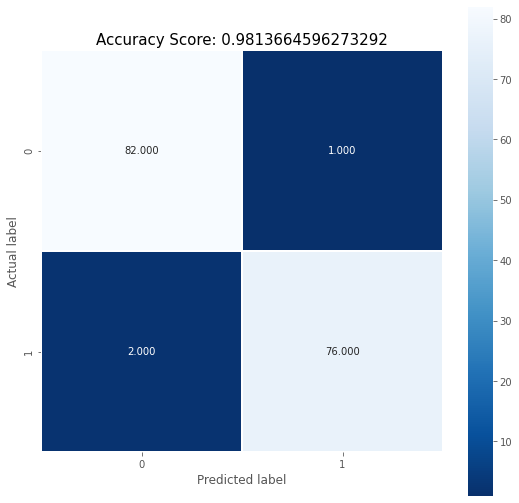

In [529]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

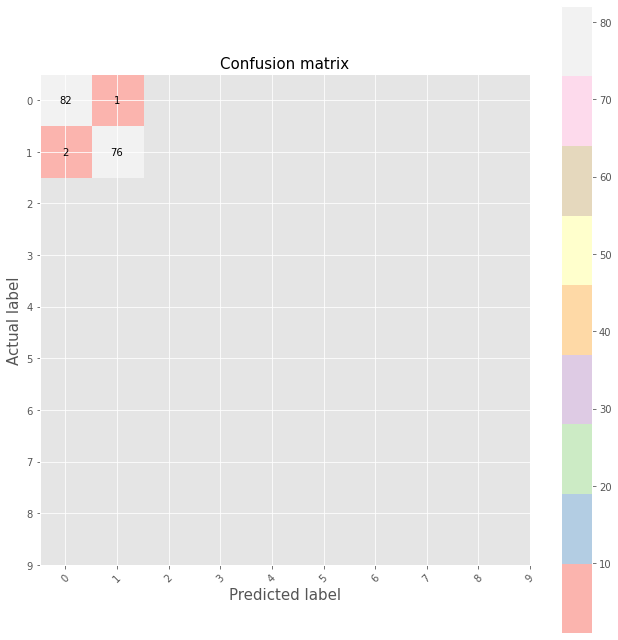

In [530]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [531]:
# Read in csv file
# File: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Python_Basics/Linear_Regression/linear.csv


#raw_data= pd.read_csv(r"featMatVersion0.csv")
#This is the unedited file from Eddie

#raw_data = pd.read_csv(r"featMatVersion1.csv")

#raw_data = pd.read_csv(r"featMatVersion2.csv")


#/content/featMatVersion2.csv

#raw_data = pd.read_csv(r"featMatVersion3.csv")

#raw_data = pd.read_csv(r"featMatVersion4.csv")
#Same as original but no comunns 2 and 13


#raw_data= pd.read_csv(r"featMatVersion5.csv")
#Same as version1 but no comunns 2 and 13


#raw_data = pd.read_csv(r"featMatVersion6.csv")
#Same as version2 but no comunns 2 and 13


#raw_data = pd.read_csv(r"featMatVersion7.csv")
#Same as version3 but no comunns 2 and 13


raw_data = pd.read_csv(r"featMatVersion8.csv")
#Same as version0 but only 2 users
#has only 2 users






In [532]:
raw_data.head()

,User_ID,Doc_ID,Inter-Stroke time,Stroke Duration,Start X,Start Y,Stop X,Stop Y,Direct end-to-end Distance,Mean resulant length,WSAD Flag,Direction of end-to-end Time,Phone_ID,20 per pairwise velocity,50 per pairwise velocity,80 per pairwise velocity,20 per pairwise acc,50 per pairwise acc,80 per pairwise acc,Median velocity at last 3pts,Largest deviation from end-to-end line,20 per dev line,50 per dev line,80 per dev line,Average Direction,Length of Trajectory,Ratio dist and length of trajectory,Average velocity,Median acceleration at first 5 pts,Mid-Stroke pressure,Mid-Stroke area covered,Mid-Stroke finger orientation,Change of finger orientation,Phone orientation
0,1,4,0.913,0.320,27.7980,-35.647,5.8867,-36.737,21.939,0.83553,4,-3.09190,2,14.450,72.675,133.45,-12.047,497.89,1902.9,139.310,1.5963,-1.550000e-16,0.043064,1.135900e+00,-3.07500,22.310,0.98337,69.718,456.16,0.64,0.17778,0,0,1
1,1,4,10.818,0.172,27.5800,-31.069,4.5785,-36.737,23.690,0.77926,4,-2.90000,2,115.810,178.320,425.83,-26537.000,-1302.30,203310.0,113.500,2.5032,0.000000e+00,1.392300,2.028100e+00,-2.83590,24.629,0.96188,143.190,747.36,0.66,0.22222,0,0,1
2,1,4,0.759,0.277,5.0146,-40.553,34.4480,-32.486,30.519,0.91959,2,0.26751,2,36.830,78.611,188.46,-2217.900,1548.70,2539.3,197.020,-2.7546,-2.294100e+00,-1.119900,8.880000e-17,0.51158,31.574,0.96657,113.990,1965.30,0.65,0.22222,0,0,1
3,1,4,1.143,0.250,3.5974,-37.391,34.5570,-30.415,31.736,0.96025,2,0.22165,2,26.554,168.690,239.42,-2601.800,-1169.10,8637.7,114.770,-1.4514,-1.050000e+00,-0.492790,0.000000e+00,0.25501,32.084,0.98916,128.340,-788.47,0.77,0.24444,0,0,1
4,1,4,0.528,0.261,31.0690,-29.215,3.8155,-38.045,28.648,0.62760,4,-2.82830,2,34.637,85.099,228.20,-4750.100,-889.77,8633.5,33.615,4.9177,2.137200e-01,2.240700,3.798200e+00,-2.34940,32.598,0.87881,124.900,1384.20,0.70,0.28889,0,0,1


In [533]:



# Removes rows with NaN in them
filtered_data = raw_data[~np.isnan(raw_data)] 

# how to clean up data?

x_y = np.array(filtered_data)
x, y = x_y[:,0], x_y[:,1]

# Reshaping
x, y = x.reshape(-1,1), y.reshape(-1, 1)

filtered_data.head()



,User_ID,Doc_ID,Inter-Stroke time,Stroke Duration,Start X,Start Y,Stop X,Stop Y,Direct end-to-end Distance,Mean resulant length,WSAD Flag,Direction of end-to-end Time,Phone_ID,20 per pairwise velocity,50 per pairwise velocity,80 per pairwise velocity,20 per pairwise acc,50 per pairwise acc,80 per pairwise acc,Median velocity at last 3pts,Largest deviation from end-to-end line,20 per dev line,50 per dev line,80 per dev line,Average Direction,Length of Trajectory,Ratio dist and length of trajectory,Average velocity,Median acceleration at first 5 pts,Mid-Stroke pressure,Mid-Stroke area covered,Mid-Stroke finger orientation,Change of finger orientation,Phone orientation
0,1,4,0.913,0.320,27.7980,-35.647,5.8867,-36.737,21.939,0.83553,4,-3.09190,2,14.450,72.675,133.45,-12.047,497.89,1902.9,139.310,1.5963,-1.550000e-16,0.043064,1.135900e+00,-3.07500,22.310,0.98337,69.718,456.16,0.64,0.17778,0,0,1
1,1,4,10.818,0.172,27.5800,-31.069,4.5785,-36.737,23.690,0.77926,4,-2.90000,2,115.810,178.320,425.83,-26537.000,-1302.30,203310.0,113.500,2.5032,0.000000e+00,1.392300,2.028100e+00,-2.83590,24.629,0.96188,143.190,747.36,0.66,0.22222,0,0,1
2,1,4,0.759,0.277,5.0146,-40.553,34.4480,-32.486,30.519,0.91959,2,0.26751,2,36.830,78.611,188.46,-2217.900,1548.70,2539.3,197.020,-2.7546,-2.294100e+00,-1.119900,8.880000e-17,0.51158,31.574,0.96657,113.990,1965.30,0.65,0.22222,0,0,1
3,1,4,1.143,0.250,3.5974,-37.391,34.5570,-30.415,31.736,0.96025,2,0.22165,2,26.554,168.690,239.42,-2601.800,-1169.10,8637.7,114.770,-1.4514,-1.050000e+00,-0.492790,0.000000e+00,0.25501,32.084,0.98916,128.340,-788.47,0.77,0.24444,0,0,1
4,1,4,0.528,0.261,31.0690,-29.215,3.8155,-38.045,28.648,0.62760,4,-2.82830,2,34.637,85.099,228.20,-4750.100,-889.77,8633.5,33.615,4.9177,2.137200e-01,2.240700,3.798200e+00,-2.34940,32.598,0.87881,124.900,1384.20,0.70,0.28889,0,0,1


formula: y = [[0.69326683]]x + [2.21446384]


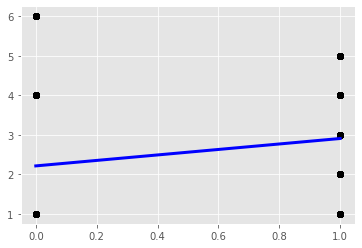

In [534]:
# Linear Regression Object 
lin_regression = LinearRegression()

# Fitting linear model to the data
lin_regression.fit(x,y)

# Get slope of fitted line
m = lin_regression.coef_

# Get y-Intercept of the Line
b = lin_regression.intercept_

# Get Predictions for original x values
# you can also get predictions for new data
predictions = lin_regression.predict(x)

# following slope intercept form 
print ( "formula: y = {0}x + {1}".format(m, b) )

# Plot the Original Model (Black) and Predictions (Blue)
plt.scatter(x, y,  color='black')
plt.plot(x, predictions, color='blue',linewidth=3)
plt.show()

In [535]:
#df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
#train = pd.read_csv(r"featMatVersion0.csv")
#This is the unedited file from Eddie

#df = pd.read_csv(r"featMatVersion1.csv")

#df = pd.read_csv(r"featMatVersion2.csv")


#/content/featMatVersion2.csv

#df = pd.read_csv(r"featMatVersion3.csv")

#df = pd.read_csv(r"featMatVersion4.csv")
#Same as original but no comunns 2 and 13


#df = pd.read_csv(r"featMatVersion5.csv")
#Same as version1 but no comunns 2 and 13


#df = pd.read_csv(r"featMatVersion6.csv")
#Same as version2 but no comunns 2 and 13

#df = pd.read_csv(r"featMatVersion7.csv")


df = pd.read_csv(r"featMatVersion8.csv")
#Same as version0 but only 2 users
#has only 2 users



#df = pd.read_csv(r"featMatVersion7.csv",names=['User_ID', 'Inter-Stroke time', 'Stroke Duration', 'Start X', 'Start Y',
 #      'Stop X', 'Stop Y', 'Direct end-to-end Distance',
  #     'Mean resulant length', 'WSAD Flag', 'Direction of end-to-end Time',
   #    '20 per pairwise velocity', '50 per pairwise velocity',
    #   '80 per pairwise velocity', '20 per pairwise acc',
     #  '50 per pairwise acc', '80 per pairwise acc',
      # 'Median velocity at last 3pts',
       #'Largest deviation from end-to-end line', '20 per dev line',
       #'50 per dev line', '80 per dev line', 'Average Direction',
       #'Length of Trajectory', 'Ratio dist and length of trajectory',
       #'Average velocity', 'Median acceleration at first 5 pts',
       #'Mid-Stroke pressure', 'Mid-Stroke area covered',
       #'Mid-Stroke finger orientation', 'Change of finger orientation',
       #'Phone orientation'] )
#Same as version3 but no comunns 2 and 13


df.head()


,User_ID,Doc_ID,Inter-Stroke time,Stroke Duration,Start X,Start Y,Stop X,Stop Y,Direct end-to-end Distance,Mean resulant length,WSAD Flag,Direction of end-to-end Time,Phone_ID,20 per pairwise velocity,50 per pairwise velocity,80 per pairwise velocity,20 per pairwise acc,50 per pairwise acc,80 per pairwise acc,Median velocity at last 3pts,Largest deviation from end-to-end line,20 per dev line,50 per dev line,80 per dev line,Average Direction,Length of Trajectory,Ratio dist and length of trajectory,Average velocity,Median acceleration at first 5 pts,Mid-Stroke pressure,Mid-Stroke area covered,Mid-Stroke finger orientation,Change of finger orientation,Phone orientation
0,1,4,0.913,0.320,27.7980,-35.647,5.8867,-36.737,21.939,0.83553,4,-3.09190,2,14.450,72.675,133.45,-12.047,497.89,1902.9,139.310,1.5963,-1.550000e-16,0.043064,1.135900e+00,-3.07500,22.310,0.98337,69.718,456.16,0.64,0.17778,0,0,1
1,1,4,10.818,0.172,27.5800,-31.069,4.5785,-36.737,23.690,0.77926,4,-2.90000,2,115.810,178.320,425.83,-26537.000,-1302.30,203310.0,113.500,2.5032,0.000000e+00,1.392300,2.028100e+00,-2.83590,24.629,0.96188,143.190,747.36,0.66,0.22222,0,0,1
2,1,4,0.759,0.277,5.0146,-40.553,34.4480,-32.486,30.519,0.91959,2,0.26751,2,36.830,78.611,188.46,-2217.900,1548.70,2539.3,197.020,-2.7546,-2.294100e+00,-1.119900,8.880000e-17,0.51158,31.574,0.96657,113.990,1965.30,0.65,0.22222,0,0,1
3,1,4,1.143,0.250,3.5974,-37.391,34.5570,-30.415,31.736,0.96025,2,0.22165,2,26.554,168.690,239.42,-2601.800,-1169.10,8637.7,114.770,-1.4514,-1.050000e+00,-0.492790,0.000000e+00,0.25501,32.084,0.98916,128.340,-788.47,0.77,0.24444,0,0,1
4,1,4,0.528,0.261,31.0690,-29.215,3.8155,-38.045,28.648,0.62760,4,-2.82830,2,34.637,85.099,228.20,-4750.100,-889.77,8633.5,33.615,4.9177,2.137200e-01,2.240700,3.798200e+00,-2.34940,32.598,0.87881,124.900,1384.20,0.70,0.28889,0,0,1


In [536]:


features=[ 'Inter-Stroke time', 'Stroke Duration', 'Start X', 'Start Y',
       'Stop X', 'Stop Y', 'Direct end-to-end Distance',
       'Mean resulant length', 'WSAD Flag', 'Direction of end-to-end Time',
       '20 per pairwise velocity', '50 per pairwise velocity',
       '80 per pairwise velocity', '20 per pairwise acc',
       '50 per pairwise acc', '80 per pairwise acc',
       'Median velocity at last 3pts',
       'Largest deviation from end-to-end line', '20 per dev line',
       '50 per dev line', '80 per dev line', 'Average Direction',
       'Length of Trajectory', 'Ratio dist and length of trajectory',
       'Average velocity', 'Median acceleration at first 5 pts',
       'Mid-Stroke pressure', 'Mid-Stroke area covered',
       'Mid-Stroke finger orientation', 'Change of finger orientation',
       'Phone orientation']



In [537]:

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['User_ID']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)



In [538]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
# a way to loop and make column names?
#Change from 1 to 31

#1 is worse
#2 is worse than using all
#3 is better than 2

#More seems to be more accurate
#How to compare all PCA values in an easy way?

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                           'principal component 4', 'principal component 5', 'principal component 6',
                           'principal component 7', 'principal component 8' , 'principal component 9',
                           'principal component 10'])


#, 'principal component 2'

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,3.444470,1.011339,2.078522,-0.526091,1.074555,1.066958,-0.730109,-1.547997,0.078282,1.496705
1,6.104657,1.837333,3.310439,-0.801727,1.028295,0.350752,-0.305149,-1.161724,0.106889,0.344843
2,2.992949,-3.957357,-1.221998,-2.646784,0.940336,-2.090720,0.708102,-0.042915,-0.036266,0.710323
3,3.382927,-3.275446,-0.079905,-2.262077,-0.001473,-2.549547,0.739521,0.069624,-0.134669,0.856025
4,4.900001,2.805449,6.015542,0.746695,1.531648,-0.341583,0.529588,-0.776317,0.056026,1.602935


In [539]:
finalDf = pd.concat([principalDf, df[['User_ID']]], axis = 1)

finalDf.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,User_ID
0,3.444470,1.011339,2.078522,-0.526091,1.074555,1.066958,-0.730109,-1.547997,0.078282,1.496705,1
1,6.104657,1.837333,3.310439,-0.801727,1.028295,0.350752,-0.305149,-1.161724,0.106889,0.344843,1
2,2.992949,-3.957357,-1.221998,-2.646784,0.940336,-2.090720,0.708102,-0.042915,-0.036266,0.710323,1
3,3.382927,-3.275446,-0.079905,-2.262077,-0.001473,-2.549547,0.739521,0.069624,-0.134669,0.856025,1
4,4.900001,2.805449,6.015542,0.746695,1.531648,-0.341583,0.529588,-0.776317,0.056026,1.602935,1


In [540]:
pca.explained_variance_ratio_

array([0.24338383, 0.16856221, 0.10878472, 0.09506603, 0.07360869,
       0.05155831, 0.03874568, 0.03710972, 0.03561516, 0.02928562])

In [541]:
print (pca.components_)

[[-7.09554283e-03 -1.28919237e-01  1.21314688e-01  7.10633077e-02
   8.34940479e-02 -4.01687149e-02  2.76394045e-01  3.65730309e-02
   4.70933834e-02 -2.81401257e-01  2.99410385e-01  3.31130420e-01
   2.83654489e-01 -1.30356562e-01  1.26822332e-01  2.21856053e-01
   3.21926390e-01  7.24278028e-02 -3.70781650e-02  2.91123009e-02
   1.25612339e-01 -2.71421129e-01  2.56426809e-01  1.03293569e-01
   3.44493789e-01  1.31835222e-01  1.08381044e-01  9.49278092e-02
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.31497166e-02 -1.44610767e-01 -1.93189822e-01 -2.37765442e-01
  -3.24166085e-01 -3.12668486e-01 -1.37761013e-01 -8.63764115e-02
   1.12715162e-01 -1.24460438e-01  1.33874265e-03  1.06105450e-02
   2.83945260e-02 -4.79524957e-02  8.27864959e-03  2.43596037e-02
   1.95854526e-03  3.51181610e-01  3.44564776e-01  3.45262935e-01
   2.97111315e-01 -1.26770311e-01 -1.57726281e-01  2.18348568e-02
   1.90579233e-02  1.11023069e-02 -2.70259152e-01 -2.43327729e-01
   0.00000000e+00  0.0000

In [542]:
pca2 = PCA(.95)

In [543]:
pca2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [544]:
X_train = pca2.transform(X_train)
X_test = pca2.transform(X_test)

In [545]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [546]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [547]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array([0])

In [548]:
logisticRegr.predict(X_test[0:10])

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [549]:
#logisticRegr.score(X_test, y_train)
#error inconsistent number of samples
#try making more consistent
#Not sure how to fix

In [550]:
# try knn on the pca

In [551]:
np.any(np.isnan(finalDf))

False

In [552]:
np.all(np.isfinite(finalDf))

True

In [553]:
finalDf.columns

Index(['principal component 1', 'principal component 2',
       'principal component 3', 'principal component 4',
       'principal component 5', 'principal component 6',
       'principal component 7', 'principal component 8',
       'principal component 9', 'principal component 10', 'User_ID'],
      dtype='object')

In [554]:
finalDf['User_ID'].value_counts()

1    401
0    401
Name: User_ID, dtype: int64

In [555]:
#Choosing the columns for X
#Not using 'User_ID'
#technically reusing variables
#should be fine though
#could add numbers

X = finalDf[['principal component 1', 'principal component 2', 'principal component 3',# ]].values


#columns = ['principal component 1', 'principal component 2', 'principal component 3',
                           'principal component 4', 'principal component 5', 'principal component 6',
                           'principal component 7', 'principal component 8' , 'principal component 9',
                           'principal component 10']].values

#, 'principal component 2'

# need to change here

In [556]:
#Choosing the lables for y
y = finalDf['User_ID'].values

In [557]:
#Train and test split
#80% train, 20% test
#splitting the data into test and train dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [558]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [559]:
#Training and Prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)         #value for k
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [560]:
#Make prediction on the test data
y_pred = classifier.predict(X_test)

In [561]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  3]
 [ 5 79]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        77
           1       0.96      0.94      0.95        84

    accuracy                           0.95       161
   macro avg       0.95      0.95      0.95       161
weighted avg       0.95      0.95      0.95       161



In [562]:
#PCA of 2 decreased the accuracy
#should try increasing the pca values

In [563]:
#prints the entire confusion matrix
#however, it doesnn't fit the entire row and loops around
np.set_printoptions(threshold=sys.maxsize)
resultCM = (confusion_matrix(y_test, y_pred))
print(resultCM)

[[74  3]
 [ 5 79]]


In [564]:
resultCR = (classification_report(y_test, y_pred))
print(resultCR)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        77
           1       0.96      0.94      0.95        84

    accuracy                           0.95       161
   macro avg       0.95      0.95      0.95       161
weighted avg       0.95      0.95      0.95       161



In [565]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [566]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [567]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([0])

In [568]:
logisticRegr.predict(X_test[0:10])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [569]:
predictions = logisticRegr.predict(X_test)

In [570]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.906832298136646


In [571]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[71  6]
 [ 9 75]]


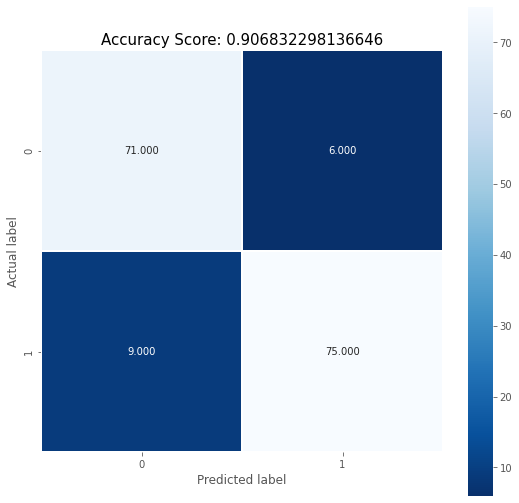

In [572]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

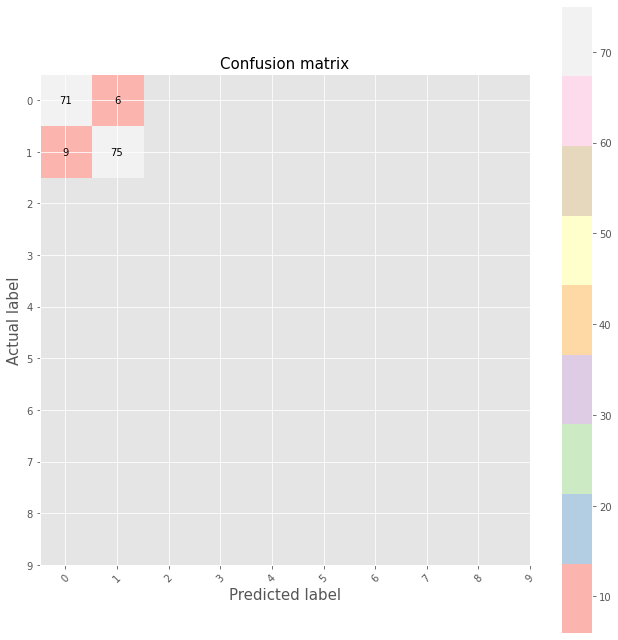

In [573]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')